In [24]:
import sys
sys.path.append('..')
from pathlib import Path
from datetime import datetime
from dateutil import tz
from glob import glob
from collections import namedtuple

from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import geopandas
from cartopy import crs as ccrs

from Map import Map

In [25]:
LOCATION = 'conus'

In [26]:
def get_gdf():
    return geopandas.read_file(glob('data/national_shapefile_fcst*.shp')[0])

In [27]:
def get_status(raw_data, status):
    return raw_data[raw_data['Status'] == status]

In [28]:
def get_river_stage_attributes(color, size, category):
    Stage = namedtuple("Stage", ["color", "size", "category"])
    description = Stage(color, size, category)
    return description

def river_stage_categories():
    raw_data = get_gdf()
    minor, moderate, major = [get_status(raw_data, status) 
                              for status in ('minor', 'moderate', 'major')]

    return {
        'minor': get_river_stage_attributes('#ff9900', 300, minor),
        'moderate': get_river_stage_attributes('#ff0000', 600, moderate),
        'major': get_river_stage_attributes('#cc33ff', 900, major)
    }

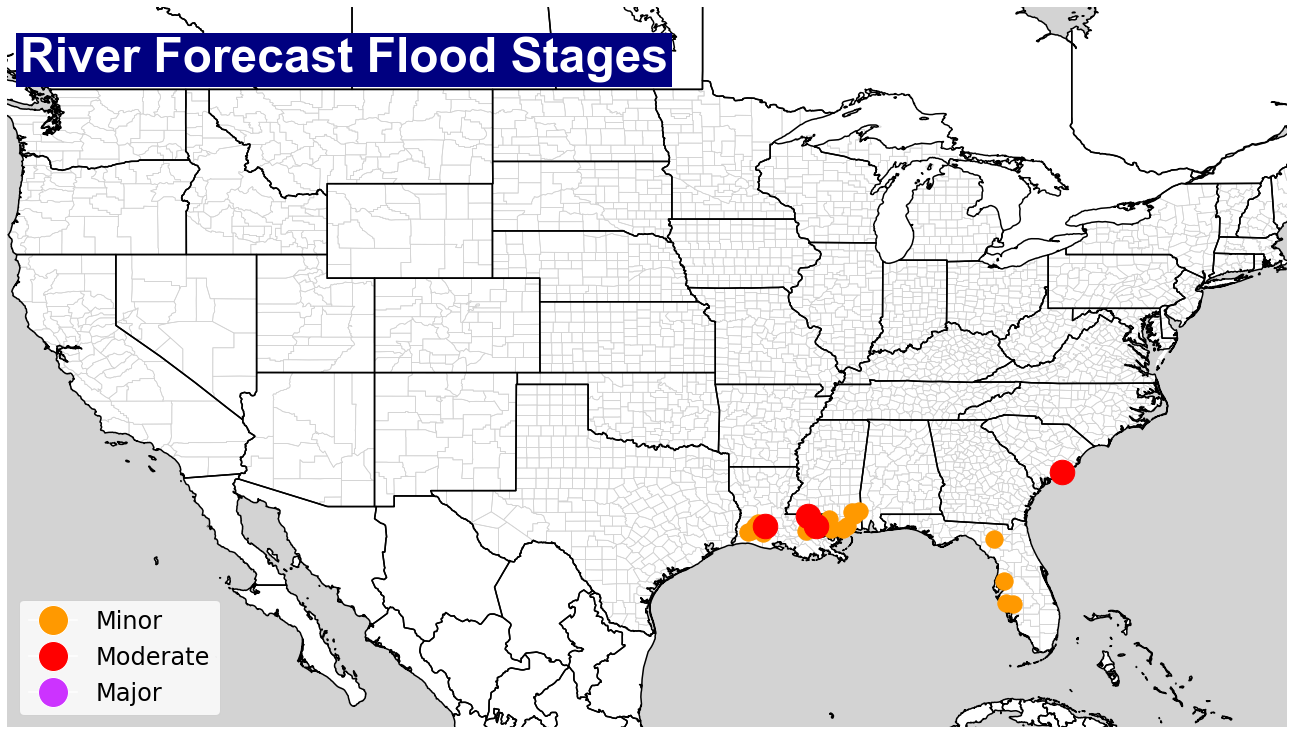

In [29]:
def plot_legend(ax):
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Minor',
                              markerfacecolor='#ff9900', markersize=30),
                       Line2D([0], [0], marker='o', color='w', label='Moderate',
                              markerfacecolor='#ff0000', markersize=30),
                       Line2D([0], [0], marker='o', color='w', label='Major',
                              markerfacecolor='#cc33ff', markersize=30)]
    ax.legend(handles=legend_elements, fontsize=24, loc='lower left',)
    
def save_map_to_disk(fig):
    GRAPHICS_DIR = Path('.') / '..' / '..' / 'graphics' / 'hydro'
    fig.savefig(f'{GRAPHICS_DIR}/flood_river-stages_{LOCATION}.png', dpi=72)

def plot_river_stages(ax):
    river_data = river_stage_categories()
    for status in river_data.keys():
        latitude = river_data[status].category['Latitude'],
        longitude = river_data[status].category['Longitude'],
        color = river_data[status].color
        size = river_data[status].size
        ax.scatter(longitude, latitude, c=color, marker='o', s=size, zorder=11, 
                   transform=ccrs.PlateCarree())
        
def plot_river_stage_map():
    new_map = Map(LOCATION)
    new_map.add_counties()
    new_map.add_title(f'River Forecast Flood Stages')
    fig, ax = new_map.make_map()
    plot_river_stages(ax)
    plot_legend(ax)
    save_map_to_disk(fig)

plot_river_stage_map()